# House Rent Price Prediction Using Machine Learning

**Author** : Adarsh Rathore

**Date** : 6 May 2025

**Dataset** : Kaggle - House Rent Prices of Metropolitan Cities in India


## Objective
- Understand the key drivers for rental pricing.
- Train the model to predict rental values.
- Evaluate model using appropriate metrices.


## Problem Statement
The goal of this project is to build a machine learning model that can **predict house rental prices** in indian metropolitan cities based on features such as area, location, layout type and furnishing status.


## Dataset description
**Source:** [Kaggle Dataset](https://www.kaggle.com/datasets/saisaathvik/house-rent-prices-of-metropolitan-cities-in-india?select=_All_Cities_Cleaned.csv)

 **Format:**CSV

 **Target Variable:** `price`

 **Key Features:** `Area`, `City`, `Furnishing Status`, `locality`, etc.


## Workflow
 1. Data Loading
 2. Taking a Look at the data structure
 3. Train/Test Split
 4. Feature Engineering
 5. Data Cleaning & Preprocessing
 6. IMPORTANT : Trying Various Aspects
 7. Analysing and Rectifying The Error
 8. Building Model
 9. Fine Tune
 10. Final Model
 11. Ploting Graphs
 12. Exporting Model and Pipeline




---

# Getting Started

### Essential imports.

In [ ]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import subprocess
import os

# google environment
from google.colab import files

# Scikit-learn - Preprocessing & Utilities
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Statistical Distributions
from scipy.stats import randint

# Visualizations
from pandas.plotting import scatter_matrix

# Dumping
import compress_pickle as pickle

It is recommended that you perform it on google colab, as it has various advantages (like fast execution). Otherwise you may perform it on your local environment as well.

### 1. Data Loading

Initally we need to get the data. Here we have two options, either we upload it manually from our setup or link this notebook with the online dataset(kaggle) directly. I have provided the dataset link, u may refer to that for downloading manually and keep the file inside "dataset" directory

**Automates Downloading using download_dataset() :**

This function helps us to download the dataset using two parameter.
First parameter is dataset(inputs kaggle CLI) Secondly path(default is dataset directory). It initailly demands for kaggle.json file which u can download from its website : https://www.kaggle.com/

In [ ]:
# !pip install kaggle

In [ ]:
from google.colab import files
import subprocess

def download_dataset(dataset, download_path = 'dataset'):
  files.upload() # uploading the json file

  !mkdir ~/.kaggle # creating directory
  !mv kaggle.json ~/.kaggle/ # Moving the json file
  !chmod 600 ~/.kaggle/kaggle.json # Giving the required permission

  # Command to be executed to download the dataset
  command = [
          'kaggle', 'datasets', 'download',
          '-d', dataset,
          '-p', download_path,
          '--unzip'
  ]

  # Run the command
  subprocess.run(command, check=True)


In [ ]:
dataset_add = 'saisaathvik/house-rent-prices-of-metropolitan-cities-in-india' # This via Kaggle CLI
download_dataset(dataset_add)

Now we have our required data, We can proceed futher. Now we will use a number of python-libraries to perform many operations on the data. Below are the libraries which we are going to use as we go further.

In [ ]:
# These all python-libraries comes built-in, if you are using google-colab. If not then , you may download using terminal.
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn

For this project we will use "_All_Cities_Cleaned.csv" as our data set. In order to read the csv file, we will be using pandas a python-library.

load_data() method takes csv_path as parameter and return a DataFrame.

In [ ]:
# import pandas as pd
def load_data(csv_path):
  return pd.read_csv(csv_path)

In [ ]:
housing_data = load_data('dataset/_All_Cities_Cleaned.csv')

### 2. Taking A Look At The Data Structure

In this section we are going to perform some basic operations to understand data even better that includes viewing data structure and summary, Visualizing data with plots like histograms, box plots, and scatter plots, etc.

In [ ]:
housing_data.head() # Shows first five rows

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


This info() can be useful. It tells us the data types of all the columns(features), also if number of non-null values is less than the number of entires means there might be some missing values, which isn't in the case in our dataset.

In [ ]:
housing_data.info() # Information related to data we fetched

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    193011 non-null  object 
 1   bedroom        193011 non-null  float64
 2   layout_type    193011 non-null  object 
 3   property_type  193011 non-null  object 
 4   locality       193011 non-null  object 
 5   price          193011 non-null  float64
 6   area           193011 non-null  float64
 7   furnish_type   193011 non-null  object 
 8   bathroom       193011 non-null  float64
 9   city           193011 non-null  object 
dtypes: float64(4), object(6)
memory usage: 14.7+ MB


Feature `city` seems repetitive, we can consider it as **categorial feature**. Same goes with `seller_type`, `layout_type`, `locality`, `property_type` and `furnish_type` and rest are termed as **Numerical feature**. Will use value_count() method to know the category.

In [ ]:
housing_data["city"].value_counts()

,count
city,
Mumbai,67416
Delhi,32608
Bangalore,23072
Pune,22596
Ahmedabad,18453
Hyderabad,10544
Kolkata,9664
Chennai,8658


This above tells us, it contains data for 8 cities. Similarly we can perform the same for other categorical features as well.

Next we going to use descrive(), shows the summary of all numerical attributes.

In [ ]:
housing_data.describe()

,bedroom,price,area,bathroom
count,193011.000000,1.930110e+05,193011.000000,193011.000000
mean,2.081679,4.433654e+04,1264.604468,2.059883
std,0.956901,9.195199e+04,1043.725561,0.934805
min,1.000000,1.200000e+03,3.000000,1.000000
25%,1.000000,1.300000e+04,650.000000,1.000000
50%,2.000000,2.100000e+04,1000.000000,2.000000
75%,3.000000,3.600000e+04,1440.000000,3.000000
max,15.000000,5.885000e+06,19800.000000,19.000000


We get the better idea about the data, we may plot graphs like histograms using **hist()** for better understanding.

array([[<Axes: title={'center': 'bedroom'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bathroom'}>]], dtype=object)

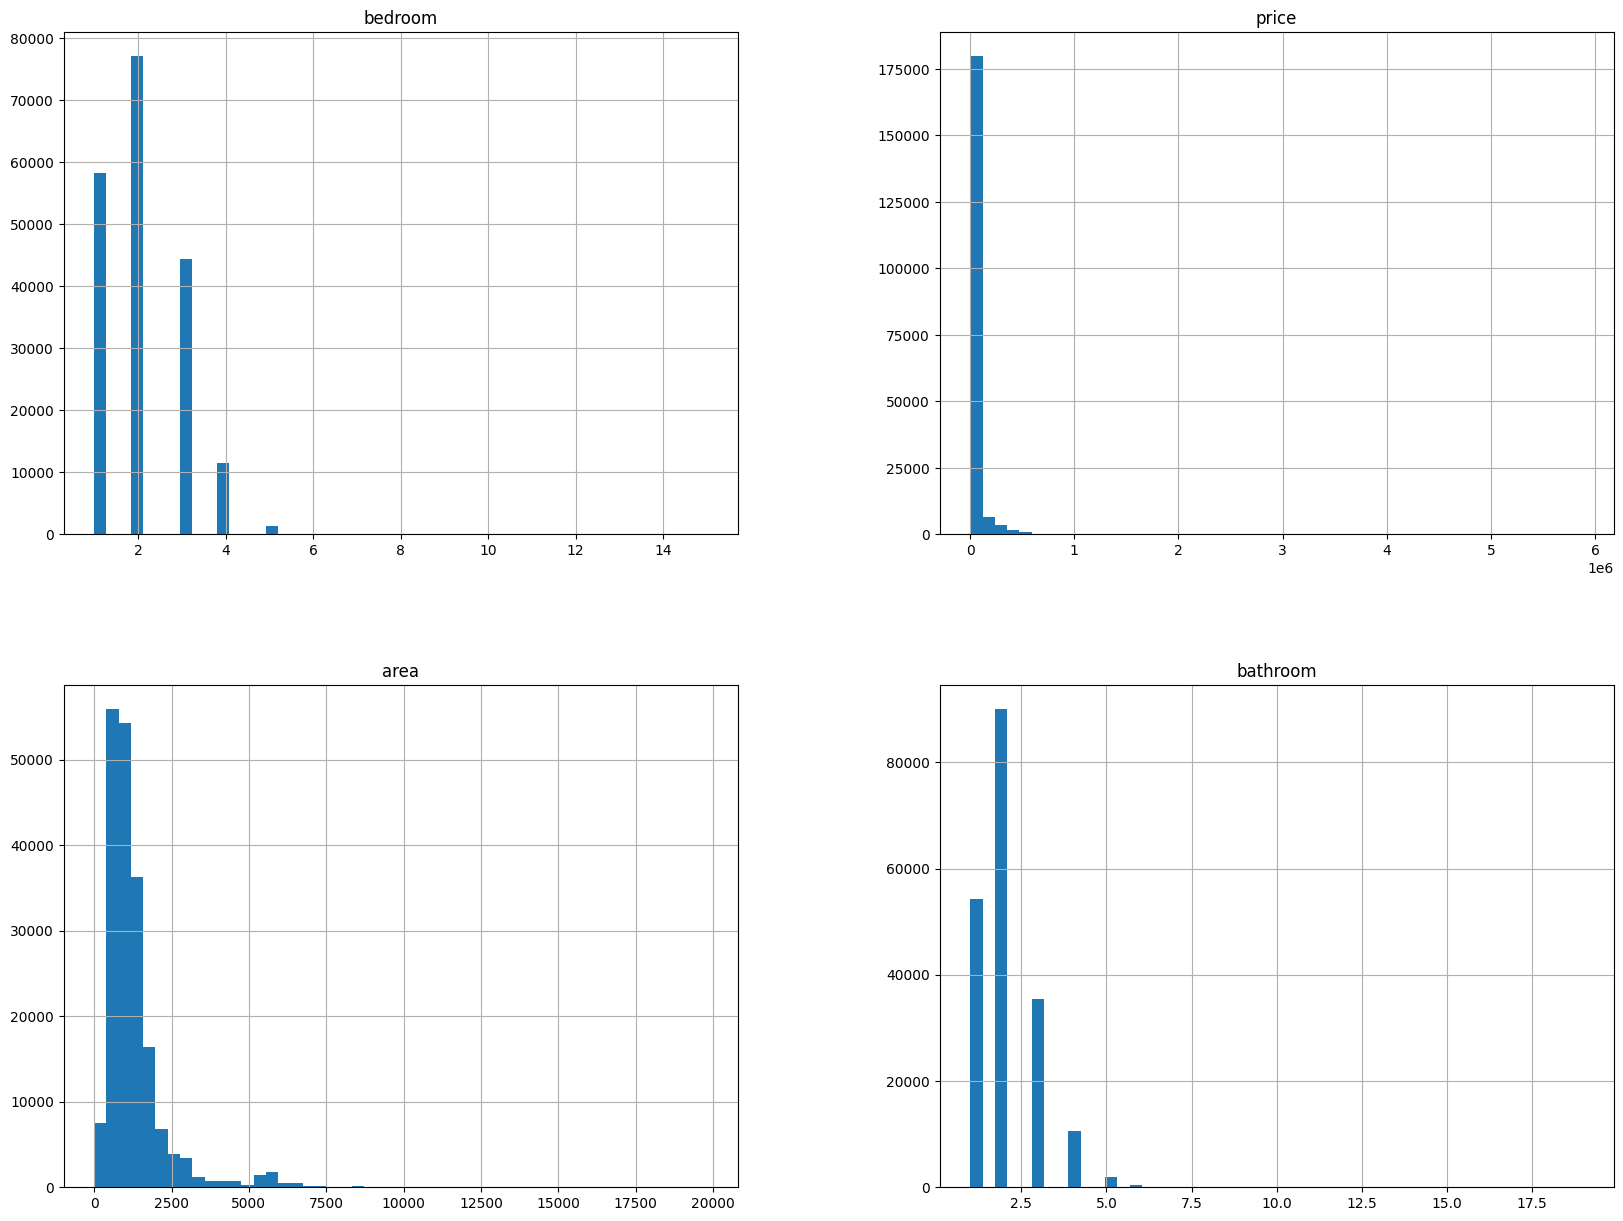

In [ ]:
housing_data.hist(bins=50, figsize=(20,15))

These graphs are useful for example histogram based on bedroom as input tells us that, 2 bedroooms are common and maximum among all. Skewness can be observed using histograms.

We may also plot boxplot to get information related to Outliers.


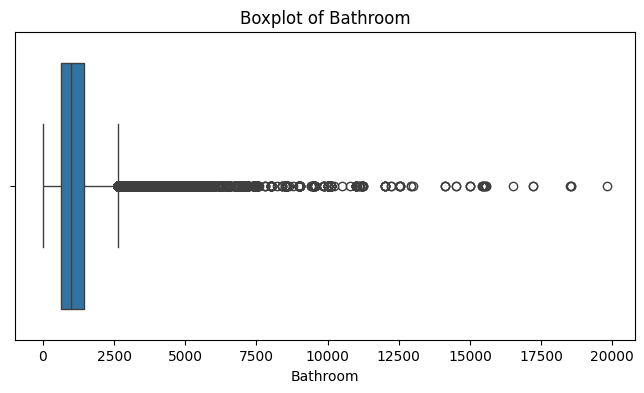

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns


plt.figure(figsize=(8, 4))
sns.boxplot(x=housing_data['area'])
plt.title('Boxplot of Bathroom')
plt.xlabel('Bathroom')
plt.show()

Seems a lot of ouliers here, this is because wide range like regular apartments to penthouses and villas. Large number of outliers or skewed may affect our model training, especially for linear models, will tackle later.

Scatterplot can be used to examine better. Upward trend in scatter plot shows strong correlation. Gives valuable information eg. total_bedroom_per_total_area can be considerd important attribute.

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='area', ylabel='price'>,
        <Axes: xlabel='bedroom', ylabel='price'>,
        <Axes: xlabel='bathroom', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='area'>,
        <Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='bedroom', ylabel='area'>,
        <Axes: xlabel='bathroom', ylabel='area'>],
       [<Axes: xlabel='price', ylabel='bedroom'>,
        <Axes: xlabel='area', ylabel='bedroom'>,
        <Axes: xlabel='bedroom', ylabel='bedroom'>,
        <Axes: xlabel='bathroom', ylabel='bedroom'>],
       [<Axes: xlabel='price', ylabel='bathroom'>,
        <Axes: xlabel='area', ylabel='bathroom'>,
        <Axes: xlabel='bedroom', ylabel='bathroom'>,
        <Axes: xlabel='bathroom', ylabel='bathroom'>]], dtype=object)

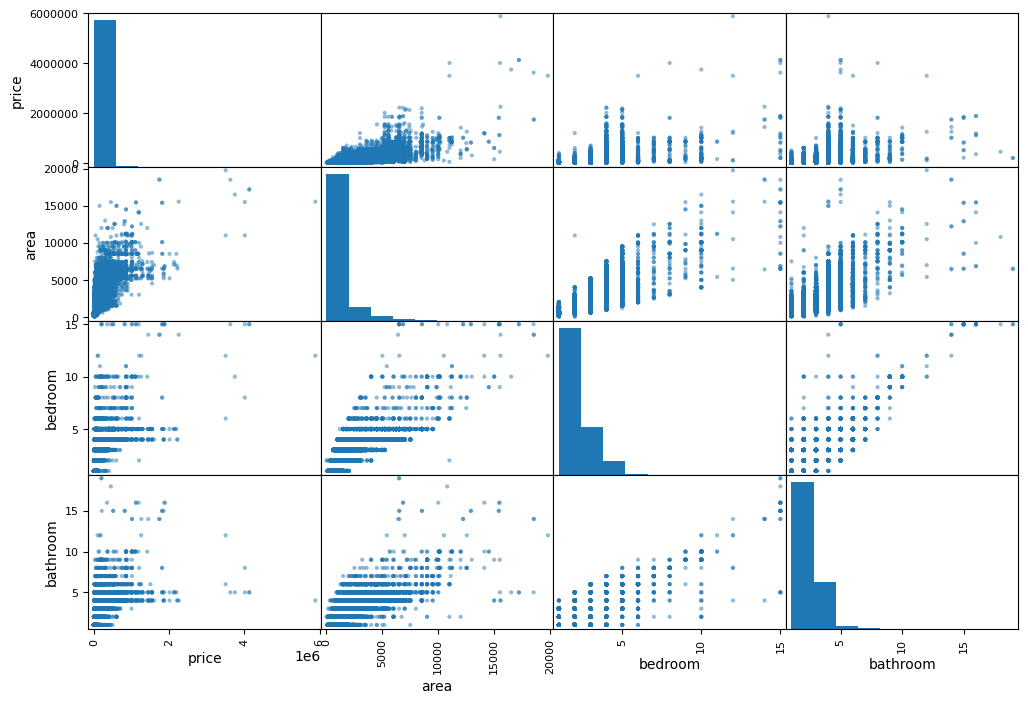

In [ ]:
# from pandas.plotting import scatter_matrix


attributes = ["price", "area", "bedroom", "bathroom"]
scatter_matrix(housing_data[attributes], figsize=(12, 8))

We can also include categorial feature to plot graphs eg. city_wise_average_rent.

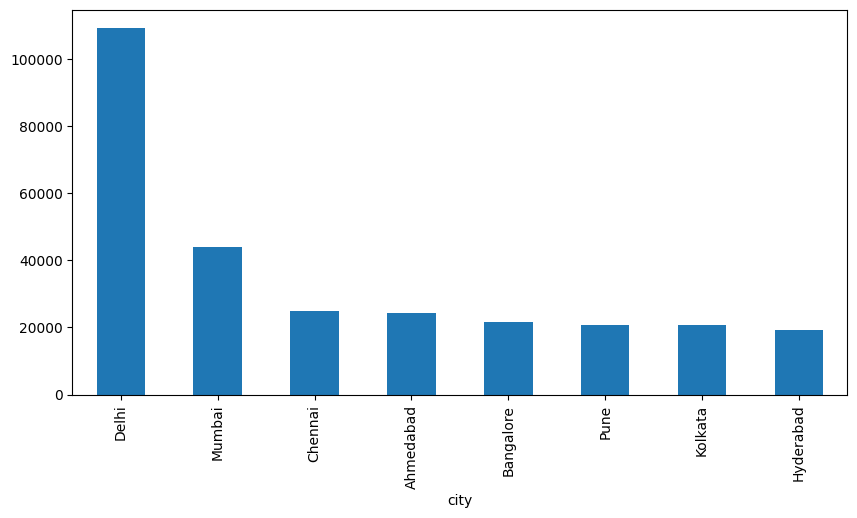

In [ ]:
housing_data.groupby("city")["price"].mean().sort_values(ascending=False)
plot = housing_data.groupby("city")["price"].mean().sort_values(ascending=False).plot(kind="bar", figsize=(10,5))

The above bar plot shows, delhi has the highest rental price. Next we going to visualize our target value which is Price here.

In [ ]:
housing_data.head() # The origanl no operation yet, before operation we must split it into train set and test set.

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


### 3. Train/Test Split
Splitting the data into train and test set using sklearn.

In [ ]:
# from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

### 4. Feature Engineering
This section is dedicated to feature engineering. Trying new features, how will they going to impact our targetvalue, extracting non-valuable features and many more.

In [ ]:
# import numpy as np

# including new features
housing_data["total_bedroom_per_total_area"] = housing_data["bedroom"]/housing_data["area"]
housing_data["total_bathroom_per_total_area"] = housing_data["bathroom"]/housing_data["area"]

# only choose numerical attribute
corr_matrix = housing_data.select_dtypes(include=[np.number]).corr()
corr_matrix["price"].sort_values(ascending=False)

,price
price,1.000000
area,0.756773
bathroom,0.534605
bedroom,0.526540
total_bathroom_per_total_area,-0.128173
total_bedroom_per_total_area,-0.130044


Seems, they cannot affect the target value much as of combined hence we can drop them.

In [ ]:
housing_data = housing_data.drop(columns=["total_bedroom_per_total_area", "total_bathroom_per_total_area"])

Now we are going to simplify the locality column which has a lot of unique values. Better encoding possible.

In [ ]:
#This will group locality by city
housing_data["locality_grouped_by_city"] = housing_data["locality"] + "_" + housing_data["city"]

# Next having 20 most significant locality will help much
top_localities = housing_data["locality_grouped_by_city"].value_counts().nlargest(20).index
housing_data["locality_grouped"] = housing_data["locality_grouped_by_city"].apply(lambda x: x if x in top_localities else "other")

housing_data["locality_grouped"].value_counts() # Each category's count

,count
locality_grouped,
other,148374
Thane West_Mumbai,4478
Chembur_Mumbai,3549
Andheri East_Mumbai,3415
Bopal_Ahmedabad,2933
Kharghar_Mumbai,2614
Andheri West_Mumbai,2368
Bandra West_Mumbai,2360
Kandivali East_Mumbai,2234


**external feature:** As we have `city` as one of the feature, we can insert **city_wise_gdp** which will add economic context to our data.

In [ ]:
# City-wise GDP Data (Approximate, 2021) (in USD BILLION)
gdp_data = {
    'Mumbai': 310,
    'Delhi': 293.6,
    'Kolkata': 150.1,
    'Bangalore': 110,
    'Chennai': 78.6,
    'Hyderabad': 75.2,
    'Pune': 69,
    'Ahmedabad': 68
}

housing_data['city_wise_gdp'] = housing_data['city'].map(gdp_data)

corr_matrix = housing_data.select_dtypes(include=[np.number]).corr()
corr_matrix["price"].sort_values(ascending=False)

,price
price,1.000000
area,0.756773
bathroom,0.534605
bedroom,0.526540
city_wise_gdp,0.219108


Result seems good, we can keep the new attributes as it affects `price` to some extent.

### 5. Data Cleaning & Preprocessing
In this section we are going to handle missing values and preprocess our dataset, generally this step comes before feature engineering but we have already witnessed that there exist no null-values above, so i decided to perform it afterwards.

**You may skip this part, we aren't going to remove outliers**

Now comes an important point. Whether remove outliers or not. For linear models it i recommended to remove outliers whereas for decision tree, random_forest not needed. I will have a copy of original data with no outliers.

In [ ]:
# for price
housing_data_without_outliers = housing_data.copy()
q1 = housing_data_without_outliers['price'].quantile(0.25)
q3 = housing_data_without_outliers['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
housing_data_without_outliers = housing_data_without_outliers[(housing_data_without_outliers['price'] >= lower_bound) & (housing_data_without_outliers['price'] <= upper_bound)]

# for Area
q1 = housing_data_without_outliers["area"].quantile(0.25)
q3 = housing_data_without_outliers['area'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

housing_data_without_outliers = housing_data_without_outliers[(housing_data_without_outliers['area'] >= lower_bound) & (housing_data_without_outliers['area'] <= upper_bound)]

In [ ]:
housing_data_without_outliers.shape # (175520, 16)
housing_data.shape #(193011, 16)

(193011, 13)

Around 17k(~9% of the total) of the data got removed. I think it is not economical if i remove those outliers, which are not even bad data, they are data for large houses.
Few test i have performed which results : test R² went from –0.012 (with outliers) to –0.020 (without) which is not acceptable. We wont be using this `housing_data_without_outliers` futher.

In [ ]:
housing_data.head(10)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,locality_grouped_by_city,locality_grouped,city_wise_gdp
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad,Bodakdev_Ahmedabad,other,68.0
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad,CG Road_Ahmedabad,other,68.0
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad,Jodhpur_Ahmedabad,other,68.0
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad,Sanand_Ahmedabad,other,68.0
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad,Navrangpura_Ahmedabad,other,68.0
5,OWNER,1.0,BHK,Apartment,Vejalpur,8500.0,570.0,Unfurnished,1.0,Ahmedabad,Vejalpur_Ahmedabad,other,68.0
6,OWNER,1.0,RK,Studio Apartment,Jivraj Park,6000.0,180.0,Semi-Furnished,1.0,Ahmedabad,Jivraj Park_Ahmedabad,other,68.0
7,OWNER,2.0,BHK,Apartment,Nikol,12000.0,1200.0,Semi-Furnished,2.0,Ahmedabad,Nikol_Ahmedabad,other,68.0
8,OWNER,2.0,BHK,Apartment,Shahibuag,13000.0,1126.0,Semi-Furnished,2.0,Ahmedabad,Shahibuag_Ahmedabad,other,68.0
9,OWNER,4.0,BHK,Independent House,Maninagar,38500.0,3500.0,Furnished,4.0,Ahmedabad,Maninagar_Ahmedabad,other,68.0


Lets look at this histogram for price

<Axes: xlabel='price', ylabel='Count'>

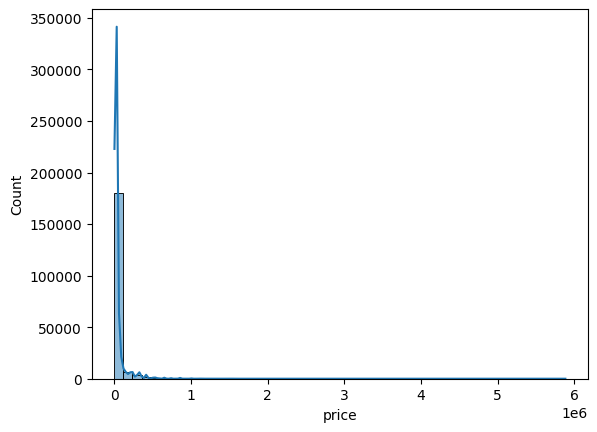

In [ ]:
# import seaborn as sns

sns.histplot(housing_data["price"], bins=50, kde=True)

This skewed thing is important to fix. Next we may also consider Log-Transformed Histogram. Log scaling is crucial as it compresses large values and expands small ones, making the data more normally distributed.

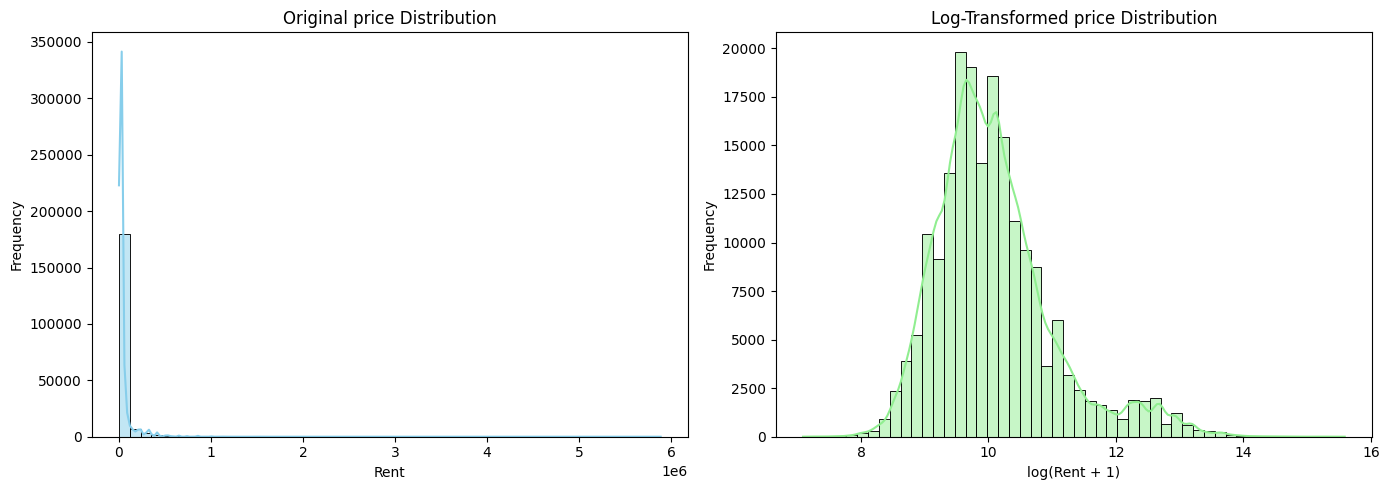

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# Set up subplots
plt.figure(figsize=(14, 5))

housing_data_temp = housing_data.copy()
housing_data_temp['log_price'] = np.log1p(housing_data_temp['price'])  # log1p safely handles 0

# Original Rent Distribution
plt.subplot(1, 2, 1)
sns.histplot(housing_data_temp['price'], bins=50, kde=True, color='skyblue')
plt.title('Original price Distribution')
plt.xlabel('Rent')
plt.ylabel('Frequency')

# Log-Transformed Rent Di/stribution
plt.subplot(1, 2, 2)
sns.histplot(housing_data_temp['log_price'], bins=50, kde=True, color='lightgreen')
plt.title('Log-Transformed price Distribution')
plt.xlabel('log(Rent + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Applying log to our original dataset. This will help the linear model to predict even better. Later on it can be re-obtained.

In [ ]:
housing_data["price"] = np.log(housing_data["price"])
housing_data["area"] = np.log(housing_data["area"]) # applying log on area feature.

# This code to get pack the rent from log
# original_rent_pred = np.expm1(predicted_log_rent)

In [ ]:
housing_data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,locality_grouped_by_city,locality_grouped,city_wise_gdp
0,OWNER,2.0,BHK,Apartment,Bodakdev,9.903488,7.279319,Furnished,2.0,Ahmedabad,Bodakdev_Ahmedabad,other,68.0
1,OWNER,1.0,RK,Studio Apartment,CG Road,8.902456,5.347108,Semi-Furnished,1.0,Ahmedabad,CG Road_Ahmedabad,other,68.0
2,OWNER,3.0,BHK,Apartment,Jodhpur,9.998798,7.549609,Unfurnished,3.0,Ahmedabad,Jodhpur_Ahmedabad,other,68.0
3,OWNER,2.0,BHK,Independent House,Sanand,9.472705,7.158514,Semi-Furnished,2.0,Ahmedabad,Sanand_Ahmedabad,other,68.0
4,OWNER,2.0,BHK,Independent House,Navrangpura,9.798127,7.377759,Furnished,2.0,Ahmedabad,Navrangpura_Ahmedabad,other,68.0


## 6. IMPORTANT : Trying Various Aspect
This section, i have done everything in sequence but the result isn't look as expected so i reconsidered many things again.
If u want follow along and see what might not work then you may go ahead **BUT** if u need the direct working code then jump to `Analysing and Rectifying The Error` section.

Looks great! Now we will perform all operations only on copy of our train set.

In [ ]:
housing = train_set.drop("price", axis=1)
housing_labels = train_set["price"].copy()

Handling categorical feature is crucial, here we performing it using OneHot encorder.

In [ ]:
#This will group locality by city
housing["locality_grouped_by_city"] = housing["locality"] + "_" + housing["city"]

# Next having 20 most significant locality will help much
top_localities = housing["locality_grouped_by_city"].value_counts().nlargest(20).index
housing["locality_grouped"] = housing["locality_grouped_by_city"].apply(lambda x: x if x in top_localities else "other")

housing["locality_grouped"].value_counts() # Each category's count

,count
locality_grouped,
other,118702
Thane West_Mumbai,3589
Chembur_Mumbai,2819
Andheri East_Mumbai,2735
Bopal_Ahmedabad,2366
Kharghar_Mumbai,2096
Andheri West_Mumbai,1908
Bandra West_Mumbai,1872
Kandivali East_Mumbai,1790


In the above step, we grouped different locality based on cities and took top 20 of them and rest termed as others.
Now applying the `OneHotEncoder`.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat = housing[["seller_type", "layout_type", "locality_grouped", "property_type", "furnish_type", "city"]]
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_1hot.toarray() # the array
cat_encoder.categories_ # the categories, we trained with

[array(['AGENT', 'BUILDER', 'OWNER'], dtype=object),
 array(['BHK', 'RK'], dtype=object),
 array(['Andheri East_Mumbai', 'Andheri West_Mumbai', 'Bandra West_Mumbai',
        'Bopal_Ahmedabad', 'Chembur_Mumbai', 'Ghansoli_Mumbai',
        'Goregaon East_Mumbai', 'Gota_Ahmedabad', 'Hinjewadi_Pune',
        'Kandivali East_Mumbai', 'Kharghar_Mumbai', 'Kondapur_Hyderabad',
        'Mira Road East_Mumbai',
        'Near Nirma University On SG Highway_Ahmedabad',
        'New Town_Kolkata', 'Powai_Mumbai', 'Saket_Delhi',
        'Thane West_Mumbai', 'Ulwe_Mumbai', 'Wagholi_Pune', 'other'],
       dtype=object),
 array(['Apartment', 'Independent Floor', 'Independent House', 'Penthouse',
        'Studio Apartment', 'Villa'], dtype=object),
 array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object),
 array(['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
        'Kolkata', 'Mumbai', 'Pune'], dtype=object)]

Now given : train_set (no changes)
we need to make changes and convert it into prepared data.
Things needed:
  numerical attributes:
  1. SimpleImputer - missing values
  2. extra_attrib_adder() --> city_wise_gdp
  3. StandarScaler

  categorical feature:
  1. cat_adder() --> locality_grouped_by_city, 	locality_grouped
  2. OneHotEncorder

`Numerical_Feature_Adder` is a custom transformer which adds new numerical feature to the dataset given.

In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin

class Numerical_Feature_Adder(BaseEstimator, TransformerMixin):
    # no *args or **kargs
    def __init__(self):
          self.gdp_data = {
            'Mumbai': 310,
            'Delhi': 293.6,
            'Kolkata': 150.1,
            'Bangalore': 110,
            'Chennai': 78.6,
            'Hyderabad': 75.2,
            'Pune': 69,
            'Ahmedabad': 68
          }

    def fit(self, X, y=None):
        return self # Nothing else to do
    def transform(self, X):
        X = X.copy()
        X['area'] = np.log1p(X['area'])  # Apply log to area
        X['city_wise_gdp'] = X['city'].map(self.gdp_data)
        # Drop city to avoid non-numeric issue
        return X.drop(columns=['city'])


Similarly `Categorical_Feature_adder` is custom transformer that adds categorial features.

In [ ]:
class Categorical_Feature_adder(BaseEstimator, TransformerMixin):
    # no *args or **kargs
    def __init__(self):
          None

    def fit(self, X, y=None):
        return self # Nothing else to do
    def transform(self, X):
        X = X.copy()
        X['locality_grouped_by_city'] = X['locality'] + "_" + X['city']
        top_localities = X['locality_grouped_by_city'].value_counts().nlargest(20).index
        X['locality_grouped'] = X['locality_grouped_by_city'].apply(lambda x: x if x in top_localities else 'other')

        return X[['seller_type', 'layout_type', 'property_type', 'furnish_type', 'city', 'locality_grouped']]

Now it's time to create Transformation Piplines for both numerical and categorial feature, which will ensure the sequencial execution of all transformers.

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder


# Attributes BEFORE transformation
num_attribs = ["area", "bedroom", "bathroom", "city"]
cat_attribs = ["seller_type", "layout_type", "property_type", "furnish_type", "city", "locality"]

num_pipeline = Pipeline([
    ('add_gdp', Numerical_Feature_Adder()),
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('add_cat_features', Categorical_Feature_adder()),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


Finally we going to have a ColumnTransformer for specified column-wise transformation and create a full_pipeline which will transform the dataset.

In [ ]:
# from sklearn.compose import ColumnTransformer

# Combined full_pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

Finally done with it. Now we use `full_pipeline` to transform our data to prepared data for model.

In [ ]:
housing = train_set.drop("price", axis=1)
housing_labels = train_set["price"].copy()

housing.head()

,seller_type,bedroom,layout_type,property_type,locality,area,furnish_type,bathroom,city
43304,AGENT,5.0,BHK,Independent House,Neelankarai,5000.0,Semi-Furnished,4.0,Chennai
28431,AGENT,1.0,BHK,Independent House,Balaji Layout,400.0,Semi-Furnished,1.0,Bangalore
108274,AGENT,2.0,BHK,Apartment,Panvel,1150.0,Furnished,1.0,Mumbai
178117,AGENT,3.0,BHK,Apartment,Ravet,1150.0,Semi-Furnished,2.0,Pune
11635,AGENT,3.0,BHK,Apartment,Gota,1584.0,Unfurnished,3.0,Ahmedabad


In [ ]:
housing_prepared = full_pipeline.fit_transform(housing) # Applying the changes to the dataset.

Finally we done with preparing data to feed our model, lets build our model.

### Building Model

Here we going to feed the `prepared data` to different models and compare them on the basis of thier scores(prediction) and choose the best out there.

Starting with Linear Regression.

In [ ]:
housing_labels = np.log1p(train_set["price"].copy()) # Applying log to our data before feeding it to our model.

In [ ]:
# from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In order to check our model's prediction, we need some data, will make it pass though the `full_pipeline` and then using it to predict!

In [ ]:
some_data = housing[:5]
some_data_labels = housing_labels[:5]
prepared_data = full_pipeline.transform(some_data)

In [ ]:
# Inverse-Log conversion
# predictions_actual = np.expm1(lin_reg.predict(prepared_data))
# actual_labels = np.expm1(some_data_labels)

def i_log(data):
    return np.expm1(data)

In [ ]:
print("Prediction: ", i_log(lin_reg.predict(prepared_data)))
print("Labels:", list(i_log(some_data_labels)))

Prediction:  [109023.94976766   6175.01070028  38026.33084137  21650.34923069
  16707.29515997]
Labels: [100000.00000000003, 8320.000000000002, 13999.999999999995, 18999.999999999985, 13399.999999999989]


Predictions seems great, but we cannot judge with just 5 sample-based-predictions. Now we will use RMSE to calculate error.

In [ ]:
# from sklearn.metrics import mean_squared_error

def calculate_rmse(model, prepared_data, true_labels, inverse_log=True):
    predictions = model.predict(prepared_data)
    if inverse_log:
        predictions = np.expm1(predictions)
        true_labels = np.expm1(true_labels)
    mse = mean_squared_error(true_labels, predictions)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)


RMSE comes out to be: **~53130.3** which,  I think can be improved using more powerful models.

We can also perform **cross-validation** for better evaluation.

In [ ]:
# from sklearn.model_selection import cross_val_score

def calculate_score(model, housing_prepared, housing_labels):
  scores = cross_val_score(model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
  rmse_scores = np.sqrt(-scores)

  print("Scores: ", rmse_scores)
  print("Mean: ", rmse_scores.mean())
  print("Standard Deviation: ", rmse_scores.std())

In [ ]:
# Provide the actual training set.
calculate_score(lin_reg, housing_prepared, housing_labels)

Scores:  [0.45216108 0.45732922 0.45676338 0.45088407 0.44782689 0.44816445
 0.44877629 0.4471027  0.44956977 0.45009448]
Mean:  0.45086723352832464
Standard Deviation:  0.0033995458881887707


A lower score means better overall predictive accuracy, and a small standard deviation means the model’s performance is stable across different subsets of the data. (Value near 0 indicates excellent fit while values closer to 1 indicate poor fit)

Next we are going try out RandomForestRegressor model.

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [ ]:
calculate_rmse(forest_reg, prepared_data, some_data_labels) #44776.93047470888

RMSE:  44776.93047470888


This result `44776.9` looks much better, and we can consider this model. Calculating score going to take a lot of time.

In [ ]:
calculate_score(forest_reg, housing_prepared, housing_labels) # u need to wait a while

It is recommended to store the performance of different models for comparision. We only have two so i am ignoring that part.

### Fine Tuning

Here we going to fine tune our model. We will try various combinations of hyperparameter and based on their performance, we going to choose the best-possible combination. We going to use RandomizedSearchCV (as data is large)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint


param_distribs = {
    'n_estimators': randint(low=50, high=150),
    'max_features': randint(low=1, high=5),
}

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=5, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fcce1e22590>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fcce1e21d90>},
                   random_state=42, scoring='neg_mean_squared_error')

This is how we going to use our fine-tuned model for prediction.

In [ ]:
# best-possible combination we storing and going to use it for prediction. # Result (max_features=3, n_estimators=101)
best_forest = rnd_search.best_estimator_
best_forest.predict(prepared_data) # predicting using best estimators.

I got the result, so i am going to re-train my model with those `best_estimator_` values, running `RandomizedSearchCV` taking way long time.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=101, max_features=3, random_state=42) # best_estimator_ values
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(max_features=3, n_estimators=101, random_state=42)

In [ ]:
calculate_rmse(forest_reg, prepared_data, some_data_labels)

RMSE:  44661.55353171908


Slightly better than previous un-tuned model which was having **RMSE: 44776.9**  

### Evaluate Model on Test Set
Evaluation of the model based on test set will occur in this section. After we have  fine tuned our model, it is now ready to give us a good prediction.

In [ ]:
x_test = test_set.drop("price", axis=1)
y_test = np.log1p(test_set["price"].copy())

x_test_prepared = full_pipeline.transform(x_test) # make sure to transform() instead of fit()
y_test_prediction = i_log(final_model.predict(x_test_prepared))

calculate_rmse(final_model, x_test_prepared, y_test) # important to be noted

RMSE:  88644.71851090874


It seems, our model is overfitting, as it has twice the RMSE value compared to traning set.

After observing, i have decided to not apply `OneHot Encoder` part on locality, as it is creating a lot of columns, which is taking a lot of time for model to get fit and also not a good prediction.

## 7. Analysing and Rectifying the Error
Based on the result i am going to rectify my model, pipeline and custom transformer.
`AvgPriceByLocalityAdder` new custom transformer as name suggest, it calculates average price locality wise, `locality_pipeline` corresponding pipeline.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class Numerical_Feature_Adder(BaseEstimator, TransformerMixin):
    def __init__(self):
          self.gdp_data = {
            'Mumbai': 310,
            'Delhi': 293.6,
            'Kolkata': 150.1,
            'Bangalore': 110,
            'Chennai': 78.6,
            'Hyderabad': 75.2,
            'Pune': 69,
            'Ahmedabad': 68
          }


    def fit(self, X, y=None):
        return self # Nothing else to do
    def transform(self, X):
        X = X.copy()
        try:
          X['area'] = np.log1p(X['area'])  # Apply log to area
        except:
            pass
        X['city_wise_gdp'] = X['city'].map(self.gdp_data)
        # Drop city to avoid non-numeric issue
        return X.drop(columns=['city'])


In [ ]:
class AvgPriceByLocalityAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.avg_price_per_locality_ = None
        self.overall_avg_price_ = None

    def fit(self, X, y):
        df = X.copy()
        df['target'] = y

        self.avg_price_per_locality_ = df.groupby('locality')['target'].mean().to_dict()
        self.overall_avg_price_ = y.mean()
        return self

    def transform(self, X):
        X = X.copy()
        X['avg_price_locality'] = X['locality'].map(self.avg_price_per_locality_)
        X['avg_price_locality'] = X['avg_price_locality'].fillna(self.overall_avg_price_)
        X['avg_price_locality'] = np.log1p(X['avg_price_locality'])
        return X[['avg_price_locality']]


In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder


num_pipeline = Pipeline([
    ('add_gdp', Numerical_Feature_Adder()),
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

locality_pipeline = Pipeline([
    ('locality_encoder', AvgPriceByLocalityAdder())
])

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.linear_model import LinearRegression

# Combined full_pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, ['area', 'bedroom', 'bathroom', 'city']),
    ('cat', cat_pipeline, ['seller_type', 'layout_type', 'property_type', 'furnish_type']),
    ('locality', locality_pipeline, ['locality'])
])

`full_pipeline.fit_transform()` ---> going to take two input, one is X(data without traget value) and other is y (target value). We are going to perform fit_tranform() only for traning set, so no data leakage for new instances.


Preparing data for operations.

In [ ]:
# import numpy as np
housing = train_set.drop("price", axis=1)
housing_labels = np.log1p(train_set["price"].copy())

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing, housing_labels)

Required function which will going to calculate the scores.

In [ ]:
# from sklearn.metrics import mean_squared_error

def calculate_rmse(model, prepared_data, true_labels, inverse_log=True):
    predictions = model.predict(prepared_data)
    if inverse_log:
        predictions = np.expm1(predictions)
        true_labels = np.expm1(true_labels)
    mse = mean_squared_error(true_labels, predictions)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)


In [ ]:
# from sklearn.metrics import mean_absolute_error

def calculate_mae(model, prepared_data, true_labels, inverse_log=True):
    predictions = model.predict(prepared_data)
    if inverse_log:
        predictions = np.expm1(predictions)
        true_labels = np.expm1(true_labels)
    mae = mean_absolute_error(true_labels, predictions)
    print("MAE:", mae)

In [ ]:
# from sklearn.metrics import r2_score

def calculate_r2(final_model, x_test_prepared, y_test):
  predictions = final_model.predict(x_test_prepared)
  predictions_actual = np.expm1(predictions)
  r2 = r2_score(np.expm1(y_test), predictions_actual)
  print("R2 Score : ", r2)

## 8. Building Model

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
some_data = housing[98:100]
some_data_labels = housing_labels[98:100]
prepared_data = full_pipeline.transform(some_data)

print("Prediction: ", i_log(lin_reg.predict(prepared_data)))
print("Labels:", list(i_log(some_data_labels)))


calculate_rmse(lin_reg, housing_prepared, housing_labels)

Prediction:  [14386.45626847  8573.40393731]
Labels: [12999.999999999995, 9500.000000000005]
RMSE: 64656.784806217336


In [ ]:
calculate_mae(lin_reg, housing_prepared, housing_labels)

MAE: 13463.69941357436


looks good kind of training better model.
### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_jobs=-1)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_jobs=-1)

In [ ]:
calculate_rmse(forest_reg, housing_prepared, housing_labels)

RMSE: 17945.57787339135


In [ ]:
calculate_mae(forest_reg, housing_prepared, housing_labels)

MAE: 4245.625021868723


## 9. Fine Tune

The results are lot impressive than expected, now i will fine-tune the model.

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

param_distributions = {
    # number of trees
    'n_estimators': randint(100, 500),

    # maximum depth of each tree
    'max_depth': randint(5, 30),

    # number of features to consider at each split (1 to all features)
    'max_features': randint(1, 20),

    # minimum number of samples required to split an internal node
    'min_samples_split': randint(2, 20),

    # minimum number of samples required to be at a leaf node
    'min_samples_leaf':    randint(1, 10),

    # maximum number of leaf nodes
    'max_leaf_nodes':      randint(10, 200),

    # whether bootstrap samples are used when building trees
    'bootstrap':           [True, False],
}

rf = RandomForestRegressor(n_jobs=-1, random_state=42)

rnd_search = RandomizedSearchCV(
    rf,
    param_distributions,
    n_iter=10,
    cv=5,
    scoring='neg_root_mean_squared_error',
    refit=True,
    n_jobs=-1,
    random_state=42
)

rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4ec6d19a50>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4ec6d181d0>,
                                        'max_leaf_nodes': <scipy.stats....c6d18d50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4ec6d19ed0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4ec6d18710>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4ec6d10990>},
                   random_state=42, scoring='neg_root_mean_squared_error')

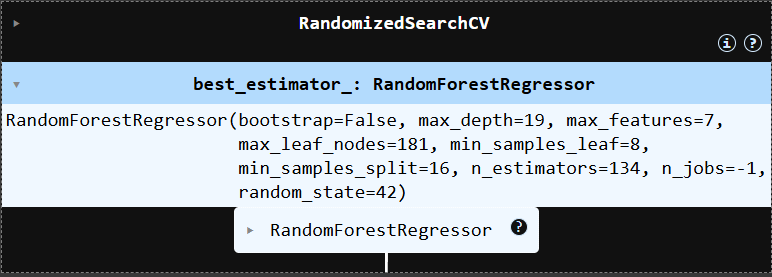

In [ ]:
final_model = rnd_search.best_estimator_

rnd_search.best_params_
# calculate_rmse(final_model, housing_prepared, housing_labels)
# calculate_mae(final_model, housing_prepared, housing_labels)

{'bootstrap': False,
 'max_depth': 19,
 'max_features': 7,
 'max_leaf_nodes': 181,
 'min_samples_leaf': 8,
 'min_samples_split': 16,
 'n_estimators': 134}

## 10. Evaluating On Test Set
The name justifies itself, here we going to evaluate on the basis of test and re-tune if needed.

In [ ]:
x_test = test_set.drop("price", axis=1)
y_test = np.log1p(test_set["price"].copy())

x_test_prepared = full_pipeline.transform(x_test) # make sure to transform() instead of fit()

# calculate_rmse(final_model, x_test_prepared, y_test) # important to be noted

### Manual Fine Tuning

In [ ]:
# Temporary model forest model with Manually trying to fine-tune
# from sklearn.ensemble import RandomForestRegressor
temp_forest = RandomForestRegressor(max_features=16, n_estimators=321, random_state=42)
temp_forest.fit(housing_prepared, housing_labels)

RandomForestRegressor(max_features=16, n_estimators=321, random_state=42)

In [ ]:
calculate_rmse(temp_forest, x_test_prepared, y_test)

# Trials Performance of temp_forest model on Test set with different combinations.---->
# 8 features , estimator = 150 : 37550.94165916671
# 8 features, estimator = 200 : 37526.31661273722 --> not much improvement (estimator is fine)
# 6 features, estimator = 150: 38074.556247346656 --> getting bad with less feature
# 9 features, estimator = 150 : 37182.70136270945 --> grt with more feature
# 12 features, estimator = 150 : 36058.167025718605
# 20 features, estimator = 150 : 36747.848269650756
# 14 feature , estimator = 150 : 36339.75579104193

# 16 features, estimator = 150 : 36165.698961653
# 16 features, estimator = 400:  35979.4892882055


# 10 features, estimator = 400 : 36535.26423071036
# 12 features, estimator = 400:  36120.484211094656

# 16 Final
# 16 features, estimator = 700 : 36154.83146661994
# 16 features, estimator = 550 : 36108.29611736922

 # 16 features, estimator = 337 : 35891.09745426858
# 16 features, estimator = 275 : 35855.22573962938
 # 16 features, estimator = 212 : 35958.79527649436

#  16 features, estimator = 306 : 35802.2633038596 <--- looks good
# 16 features, estimator = 290 : 35861.09855389038

RMSE: 35854.42986620128


In [ ]:
calculate_rmse(forest_reg, x_test_prepared, y_test) # 35,828

I have manually fine tuned my model with some trials and errors performing better than both RandomSearchCV's model `rnd_search` and
RandomForestRegressor's untuned model `forest_reg`

## 11. Final Model

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
final_model = RandomForestRegressor(
    n_estimators=306,
    max_features=16,
    random_state=42,
    n_jobs=-1
)

final_model.fit(housing_prepared, housing_labels)

RandomForestRegressor(max_features=16, n_estimators=306, n_jobs=-1,
                      random_state=42)

In [ ]:
calculate_rmse(final_model, x_test_prepared, y_test)

RMSE: 35802.263303859596


In [ ]:
calculate_mae(final_model, x_test_prepared, y_test)

MAE: 7328.648325170697


In [ ]:
calculate_r2(final_model, housing_prepared, housing_labels) # 96.1% accurate for training set.
calculate_r2(final_model, x_test_prepared, y_test) # 86% accurate for test set.

R2 Score :  0.9610655550211151
R2 Score :  0.8642290350514908


Looks Promising!

## 12. Ploting Graphs

Plot actual vs predicted:

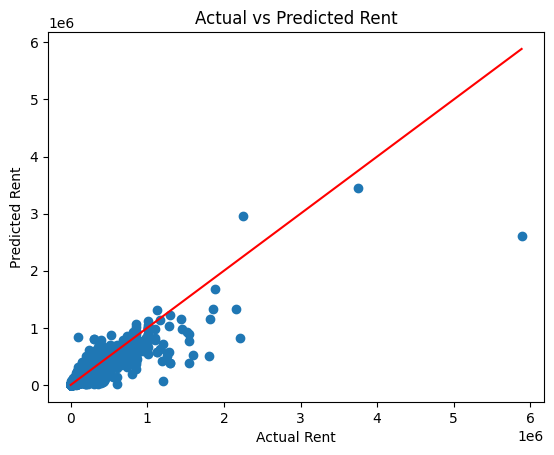

In [ ]:
# import matplotlib.pyplot as plt

predictions = final_model.predict(x_test_prepared)
predictions_actual = np.expm1(predictions)
actual_labels = np.expm1(y_test)

plt.scatter(actual_labels, predictions_actual)
plt.plot([0, max(actual_labels)], [0, max(actual_labels)], color='red')
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent")
plt.show()

Feature Importance Graph Plot:

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# feature importances
feature_importances = final_model.feature_importances_

# feature names from full pipeline
num_features = ['area', 'bedroom', 'bathroom', 'city_wise_gdp']  # from num pipeline
cat_encoder = full_pipeline.named_transformers_['cat']['encoder']
cat_features = list(cat_encoder.get_feature_names_out(['seller_type', 'layout_type', 'property_type', 'furnish_type']))
locality_features = ['avg_price_locality']

# Combine all feature names
all_features = num_features + cat_features + locality_features

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


Plot : Feature Importance

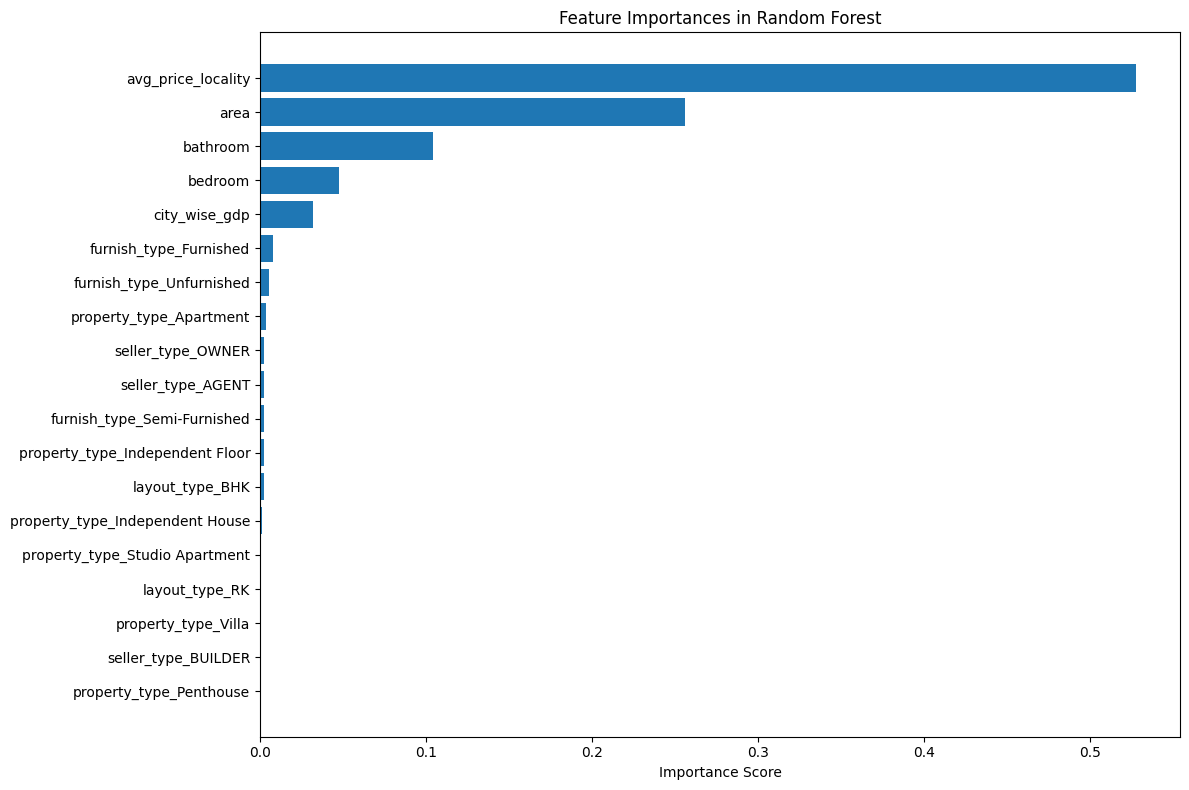

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Highest on top

plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## 13. Exporting Model and Pipeline:
It is beneficial to save our model so it can be loaded anytime and can run directly also save the pipeline as well for furture instances.

In [ ]:
# import joblib
# import os

os.makedirs("final", exist_ok=True)
joblib.dump(final_model, os.path.join("final", "best_forest.pkl"))
joblib.dump(full_pipeline, os.path.join("final", "full_pipeline.pkl"))

['final/full_pipeline.pkl']

In [ ]:
# Loading the model
final_model = joblib.load(os.path.join("final", "best_forest.pkl"))
full_pipeline = joblib.load(os.path.join("final", "full_pipeline.pkl"))

The above code downloads best_forest.pkl(huge space) and pipeline(smaller), due to it's huge size, i am re-dumping it using compress_pickle. This will be the final model i might be uploading in my github.

In [ ]:
!pip install compress_pickle

In [ ]:
# import compress_pickle as pickle

# Save using lz4 (fast and good compression)
pickle.dump(final_model, 'best_model.gz', compression='gzip')